# [Page View Time Series Visualizer](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

## Data description
The dataset contains the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03.

## Tasks
Use the data to complete the following tasks:
* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
* Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
* Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [1]:
#importing packages; 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#reading .csv file with data;
df = pd.read_csv("fcc-forum-pageviews.csv", index_col = 'date', parse_dates = ['date'])

#filtering out outlires;
df = df[(df.value >= df.value.quantile(0.025)) &
        (df.value <= df.value.quantile(0.975))]

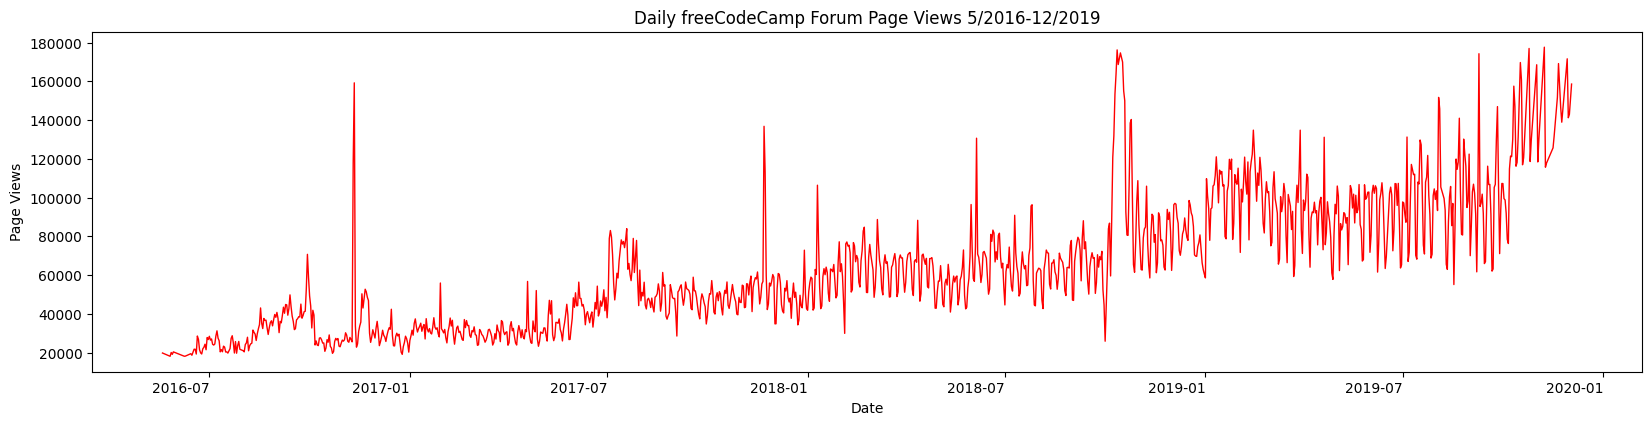

In [3]:
#drawing a line plot;  
fig = df.plot(color = 'r', lw =1, legend = False, figsize = (20, 5))
fig.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
fig.set_xlabel("Date")
fig.set_ylabel("Page Views")
fig.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
fig.xaxis.set_tick_params(rotation=0)

plt.show()

In [34]:
#creating additional columns with years and names of months;
#extracting month numbers as it is easier to sort them in order;
df["year"] = df.index.year
df["month"] = df.index.month

#estimating means grouped by year and months; 
bar_df = df.groupby(['year', 'month']).mean().reset_index()

#pivoting df;
#.plot(kind = 'bar') method displays df rows as x-axis points and columns as separate bars located at these points;
bar_df = bar_df.pivot(index = 'year', columns = 'month', values = 'value')

#renaming month columns; 
#the column names are at this point in range from 1 to 12, so it is easy to assign them full month names in order;
bar_df.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#to remove blank spaces in place of bars, we have to replace NaN values with 0 values;
# .mask() method replaces True values with provided ones;  
bar_df = bar_df.mask(pd.isna(bar_df), 0)

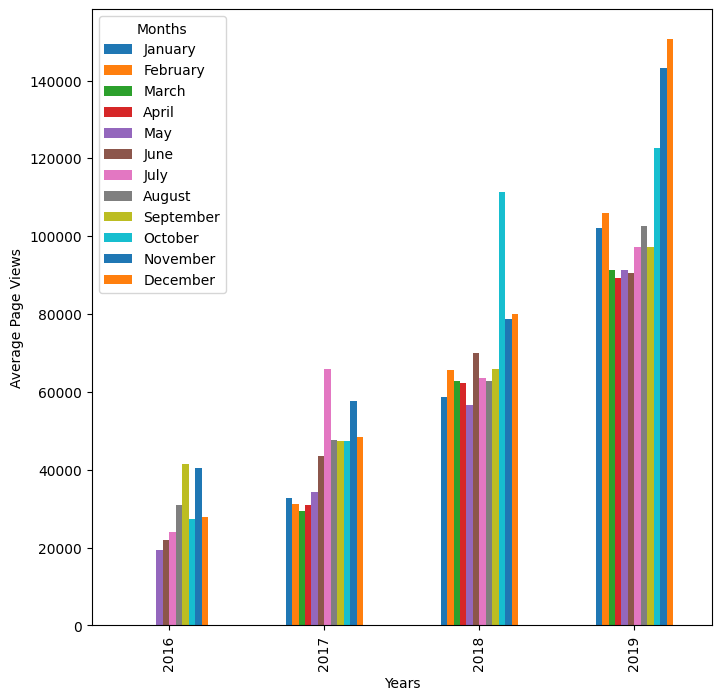

In [35]:
#drawing bar plot;
fig2 = bar_df.plot(kind = 'bar', figsize = (8,8))
fig2.set_xlabel('Years')
fig2.set_ylabel('Average Page Views')
fig2.legend(title = 'Months')

plt.show() 

In [20]:
#preparing data for boxplot (the code is initially provided);
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.month for d in df_box.date]

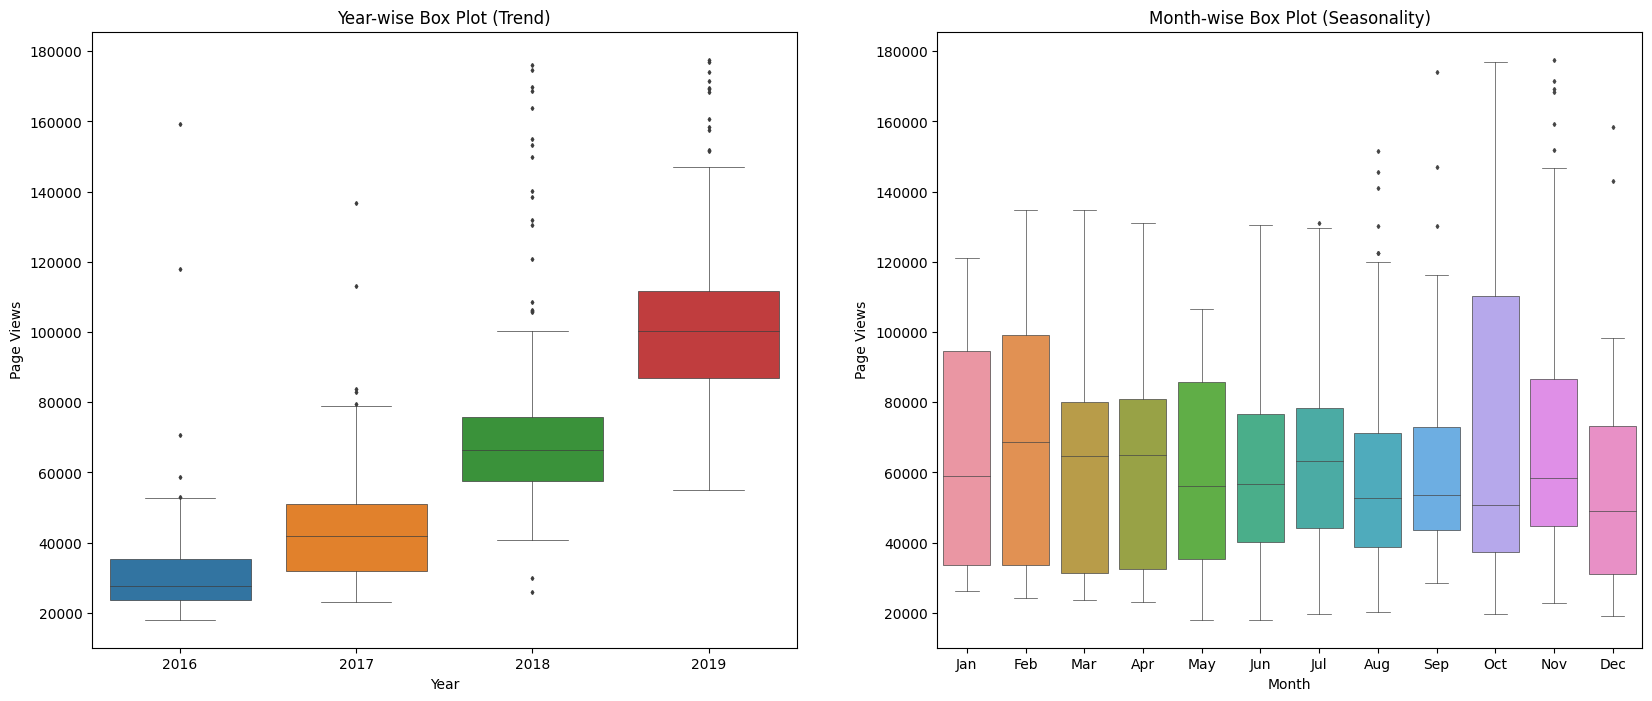

In [22]:
#initiating a figure object; 
fig = plt.figure(figsize=(20,8))

#stylizing the outlires;
flierprops = dict(markersize = 2)

#creating the first boxplot;
ax1 = fig.add_subplot(1,2,1)
boxplot1 = sns.boxplot(data = df_box, x = 'year', y = 'value', linewidth = 0.5, flierprops = flierprops, ax = ax1)
boxplot1.set_title('Year-wise Box Plot (Trend)')
boxplot1.set_xlabel('Year')
boxplot1.set_ylabel('Page Views')

#creating the second boxplot;
ax2 = fig.add_subplot(1,2,2)
boxplot2 = sns.boxplot(data = df_box, x = 'month', y = 'value', linewidth = 0.5, flierprops = flierprops, ax = ax2)
boxplot2.set_title('Month-wise Box Plot (Seasonality)')
boxplot2.set_xlabel('Month')
boxplot2.set_ylabel('Page Views')

#replacing month numbers with short names;
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
boxplot2.set_xticklabels(months)

plt.show()